In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from desiutil.plots import init_sky, plot_healpix_map, plot_grid_map, plot_sky_circles, plot_sky_binned, prepare_data

In [4]:
import warnings

In [5]:
import os

In [6]:
import mpl_toolkits

In [7]:
from desitarget.targetmask import desi_mask
import fitsio
import numpy as np

In [8]:
path = '/Users/kevinnapier/research/desi/'

In [9]:
dd = fitsio.read(os.path.join(path, 'targets-dr3.1-0.8.1.fits'), 
                 ext=1, columns=['RA','DEC','DESI_TARGET'])

In [36]:
#help(init_sky)

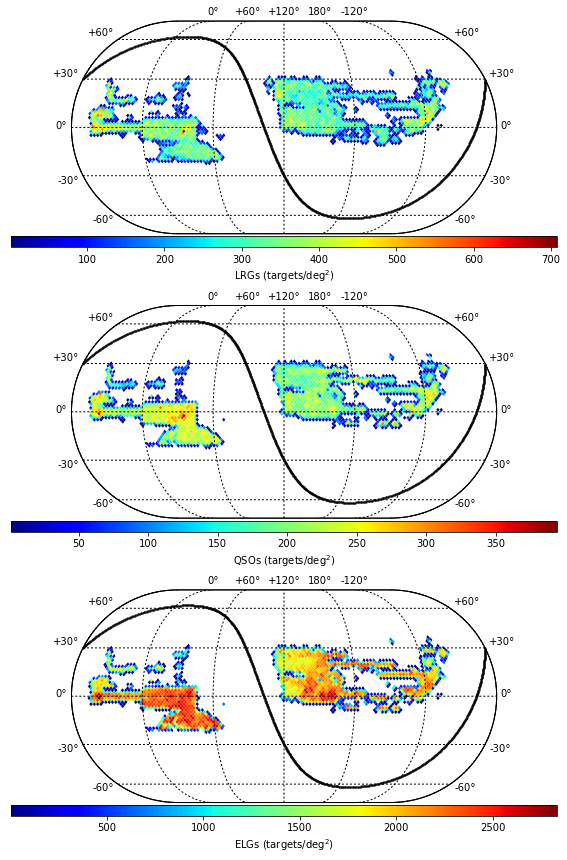

In [34]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    plt.figure(figsize=(8, 12))
    targets = ['LRG', 'QSO', 'ELG']
    for number, obj in enumerate(targets):
        cut = np.where((dd['DESI_TARGET'] & desi_mask.mask(obj)) != 0)*1
        plt.subplot(len(targets), 1, number+1)
        basemap = init_sky(galactic_plane_color='k');
        plot_sky_binned(dd['RA'][cut], dd['DEC'][cut], verbose=False, clip_lo='!1', plot_type='healpix', 
                        cmap='jet', label=r'{}s (targets/deg$^2$)'.format(obj), basemap=basemap);
        
    plt.tight_layout()